## Red Wine Quality Prediction

Dataset - https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Input variables (based on physicochemical tests):

1.  **fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2.  **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3.  **citric acid** - found in small quantities, citric acid can add 'freshness' and flavor to wines

4.  **residual sugar** - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5.  **chlorides** - the amount of salt in the wine

6.  **free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7.  **total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8.  **density** - the density of water is close to that of water depending on the percent alcohol and sugar content

9.  **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. **alcohol** - the percent alcohol content of the wine

- Output variable (based on sensory data):
12. **quality** (score between 0 and 10)

### Import Neccesary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### Import Dataset

In [8]:
df=pd.read_csv('E:\ML-krishnaik/0-Workspace/dataset/winequality-red.csv')

### Data Overview

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.shape

(1599, 12)

### Checking for null values

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# As we see there is no null values

In [16]:
#No of Records
df.shape[0]

1599

In [17]:
#No of features
df.shape[1]

12

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

As we see know the output 'quality' has range b/w 0 to 10. Let make it to the binary classification which 0 and 1 
Where,  
 - 0 - Bad Quality  (<7)
 - 1 - Good Quality (>=7)

In [20]:
# updating 0 for the quality range less than 7 , else 1
df['quality']=[1 if x >= 7 else 0 for x in df['quality']]

In [21]:
df['quality'].unique()

array([0, 1])

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [23]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

### Exploratory Data Analysis

Text(0.5, 1.0, 'Wine Quality')

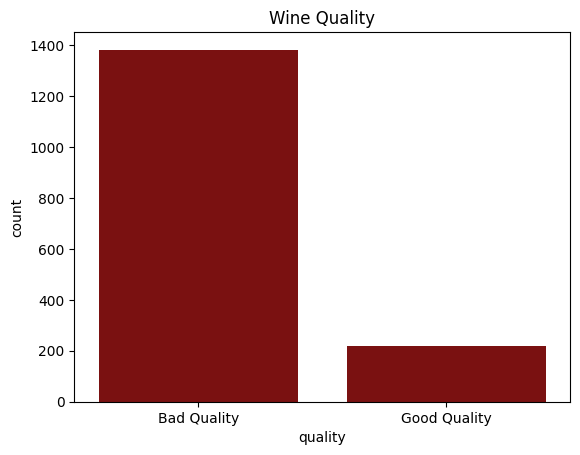

In [24]:
sns.countplot(x=df['quality'],color='darkred')
plt.xticks([0,1],['Bad Quality','Good Quality'])
plt.title('Wine Quality')

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<Axes: xlabel='fixed acidity', ylabel='alcohol'>

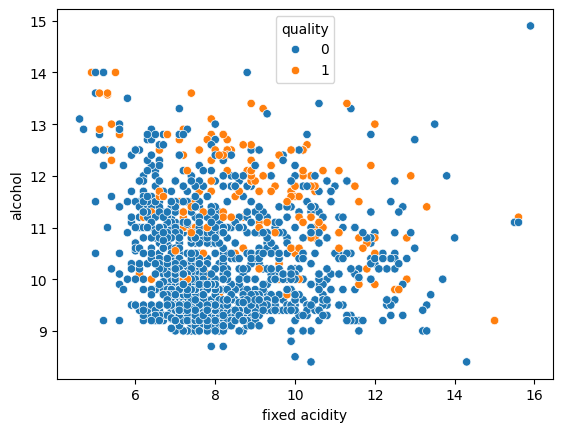

In [26]:
sns.scatterplot(x='fixed acidity',y='alcohol',hue='quality',data=df)

<Axes: xlabel='quality', ylabel='pH'>

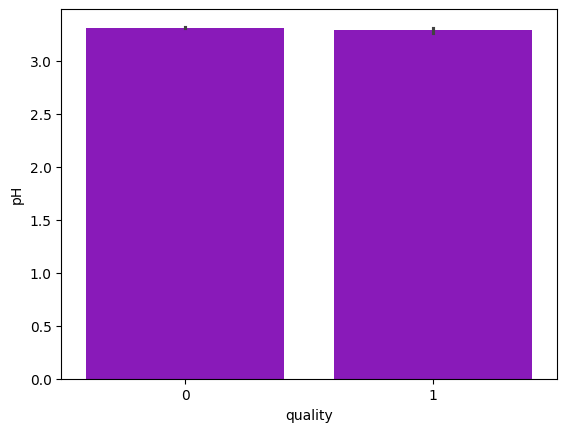

In [27]:
sns.barplot(y='pH',x='quality',data=df,color='darkviolet')

([<matplotlib.axis.XTick at 0x1fea2ceaf90>,
 [Text(0, 0, 'Bad Quality'), Text(1, 0, 'Good Quality')])

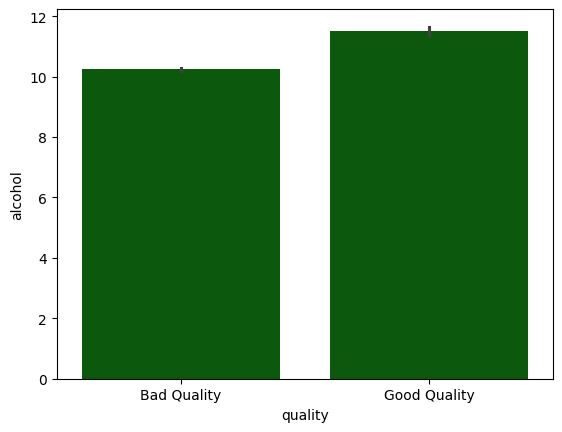

In [28]:
#checking alcohol in which has high 
sns.barplot(y='alcohol',x='quality',data=df,color='darkgreen')
plt.xticks([0,1],['Bad Quality','Good Quality'])

In [29]:
# independent and dependent 
x=df.drop(['quality'],axis=1)
y=df['quality']

In [30]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### Splitting the data for train and test

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


### Model Training

#### Ada Boost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report
ada=AdaBoostClassifier(n_estimators=1000)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print()
print('Classification Report : \n',classification_report(y_test,y_pred))

accuracy score :  0.8975

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       347
           1       0.61      0.62      0.62        53

    accuracy                           0.90       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.90      0.90      0.90       400



#### Gradient Boosting 

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print()
print('Classification Report : \n',classification_report(y_test,y_pred))

accuracy score :  0.875

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       347
           1       0.53      0.43      0.48        53

    accuracy                           0.88       400
   macro avg       0.73      0.69      0.70       400
weighted avg       0.87      0.88      0.87       400



#### Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print()
print('Classification Report : \n',classification_report(y_test,y_pred))

accuracy score :  0.905

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       347
           1       0.68      0.53      0.60        53

    accuracy                           0.91       400
   macro avg       0.81      0.75      0.77       400
weighted avg       0.90      0.91      0.90       400



#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print()
print('Classification Report : \n',classification_report(y_test,y_pred))

accuracy score :  0.8775

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       347
           1       0.57      0.30      0.40        53

    accuracy                           0.88       400
   macro avg       0.74      0.63      0.66       400
weighted avg       0.86      0.88      0.86       400



#### Support Vector Machine

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print()
print('Classification Report : \n',classification_report(y_test,y_pred))

accuracy score :  0.89

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.71      0.28      0.41        53

    accuracy                           0.89       400
   macro avg       0.81      0.63      0.67       400
weighted avg       0.88      0.89      0.87       400



In [37]:
#saving models as pickle file
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ada,open('ada.pkl','wb'))